In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob

### MCC
* mcc		код mmc
* category	Категория 

In [2]:
mcc = pd.read_excel('MCC_last.xlsx')
mcc

,mcc,category
0,742,Pet
1,763,Other
2,780,Maintenance and building
3,1520,Maintenance and building
4,1711,Maintenance and building
...,...,...
920,9311,Payments
921,9399,Other
922,9401,Other
923,9402,"Postal services, delivery"


### clients
* cnuma		номер клиента
* name		имя
* surname	фамилия
* patronymic	отчество
* categorycode	Категория клиента
* gender		пол
* age		возраст
* married	семейное положение
* email		email	
* phonenumber	номер телефона
* employer	работодатель
* residenttype	признак резидента

### client_categories
* category	Категория клиента
* description	Описание

In [3]:
clients = pd.read_csv('clients_last_2_fixed.csv', sep=';', encoding="windows-1251")
cat_description = pd.read_csv('client_categories.csv', sep=';')
clients = pd.merge(clients, cat_description, left_on='categorycode', right_on='category')
clients.head()

,cnum_,categorycode,gender,age,married_,residenttype,category,description
0,0CCCDO,81,M,32,not_married,R,81,Affluent Banking payroll customer
1,0CCCOD,81,M,36,not_married,R,81,Affluent Banking payroll customer
2,0CCDFN,81,M,50,married,R,81,Affluent Banking payroll customer
3,0CCGSH,81,M,43,not_married,R,81,Affluent Banking payroll customer
4,0CCOND,81,M,61,married,R,81,Affluent Banking payroll customer


In [4]:
clients.description.value_counts()

Corporate customer employee/ payroll scheme             744524
Regular retail banking customer                         526232
Affluent Banking payroll customer                        29987
Affluent Banking regular customer                        16245
Premium Direct Payroll Customer                          15809
Premium Direct Regular Customer                          13009
RBA employees                                             7262
Affluent Banking potential payroll customer               1051
Private Banking customers walk-in                          718
Affluent Banking potential regular customer                450
Private banking customers payroll                          317
Corporate customer manager/ regular                        236
Regular retail banking customer (family)                    54
RBA employees (family)                                      11
Corporate customer employee/ payroll scheme (family)         6
High income individuals                                

### stores
* store_name	Название магазина
* merchant_name	Название торговой точки


In [5]:
store = pd.read_csv('store_last_2.csv', sep=';', encoding="windows-1251")
store

,store_name,merchant_name
0,Банкомат,VVVVVVVVVVVVSG/W7J4K 07ZL
1,Киви,VVVVVVVVVVVVR4U4 CXD1O
2,Банкомат,VVVVVVVVVVV/078 WXWLH7J K
3,Банкомат,VVVVVVVVVVV/08 7JJ4T7H AK
4,Банкомат,VVVVVVVVVVV1SV6
...,...,...
503280,Чайхона №1,ЧАЙХОНА №M
503281,Шоколадница,ШОКОЛАДНИЦА
503282,Госавтоинспекция,ШТРАФЫ ГИБДД
503283,Афиша.Яндекс,ЯНДЕКС.АФИША


### transactions
* purchdate	дата операции
* amount		сумма
* merchantname	Название торговой точки
* mcc		код mmc
* mrchcity	город торговой точки
* cnum		номер клиента

In [6]:
df = pd.read_csv('transactions_last_2.csv', sep=';', encoding="windows-1251")
df['amount'] = df['amount']/1000.0

df = pd.merge(df, store, how='inner', 
             left_on='mrchname', right_on='merchant_name',)
df = pd.merge(df, mcc, how='inner', 
             left_on='mcc', right_on='mcc')
df = pd.merge(df, clients, how='inner', 
             left_on='cnum', right_on='cnum_')
print(df.shape)
df.head()

(70425557, 17)


,purchdate,amount,mcc,mrchcity,mrchname,cnum,store_name,merchant_name,category_x,cnum_,categorycode,gender,age,married_,residenttype,category_y,description
0,2019-11-02 00:00:00,9000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in
1,2019-11-02 00:00:00,9000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in
2,2019-11-02 00:00:00,5000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in
3,2019-11-02 00:00:00,5000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in
4,2019-10-03 00:00:00,674.5,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in


In [7]:
#MCCs by revenue
mcc_sums = df.groupby('category_x')['amount'].agg('sum').sort_values(ascending=False)

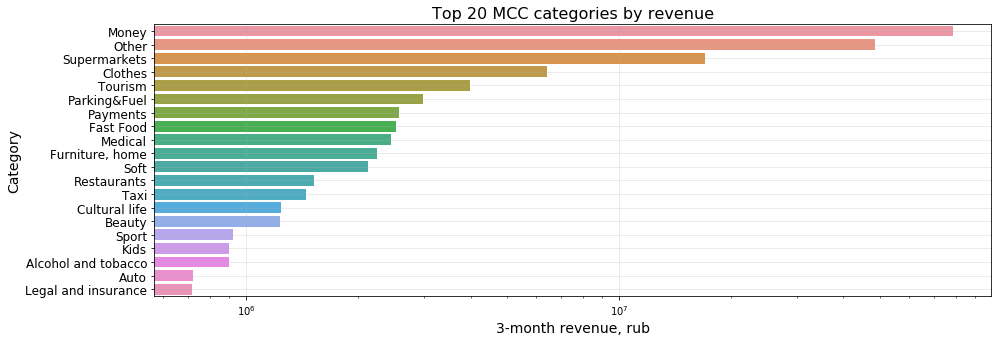

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(mcc_sums[:20], mcc_sums[:20].index)
plt.title('Top 20 MCC categories by revenue', fontsize=16)
plt.xlabel('3-month revenue, rub', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.yticks(fontsize=12)
plt.xscale('log')
plt.grid(alpha=0.3)

In [9]:
#Merchants by revenue
merch_sums = df.groupby('merchant_name')['amount'].agg('sum').sort_values(ascending=False)

In [24]:
store_sums = df[df['category_x'].isin(['Fast Food', 
                                       'Gift, hobby', 
                                       'Restaurants', 
                                       'Supermarkets'])].groupby('store_name')['amount'].agg('sum').sort_values(ascending=False)

In [25]:
store_sums

store_name
Пятерочка           2.198703e+06
Лента               2.016773e+06
Перекресток         1.380527e+06
Магнит              1.378270e+06
Азбука Вкуса        8.073800e+05
                        ...     
Взлет               7.600000e-02
Серебряный Дождь    7.200000e-02
Red Cafe            5.000000e-02
Афоня               4.896000e-02
Гурман Шоп          2.000000e-02
Name: amount, Length: 5871, dtype: float64

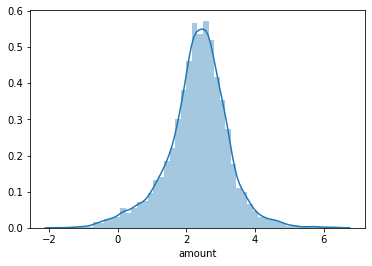

In [49]:
sns.distplot(np.log10(store_sums

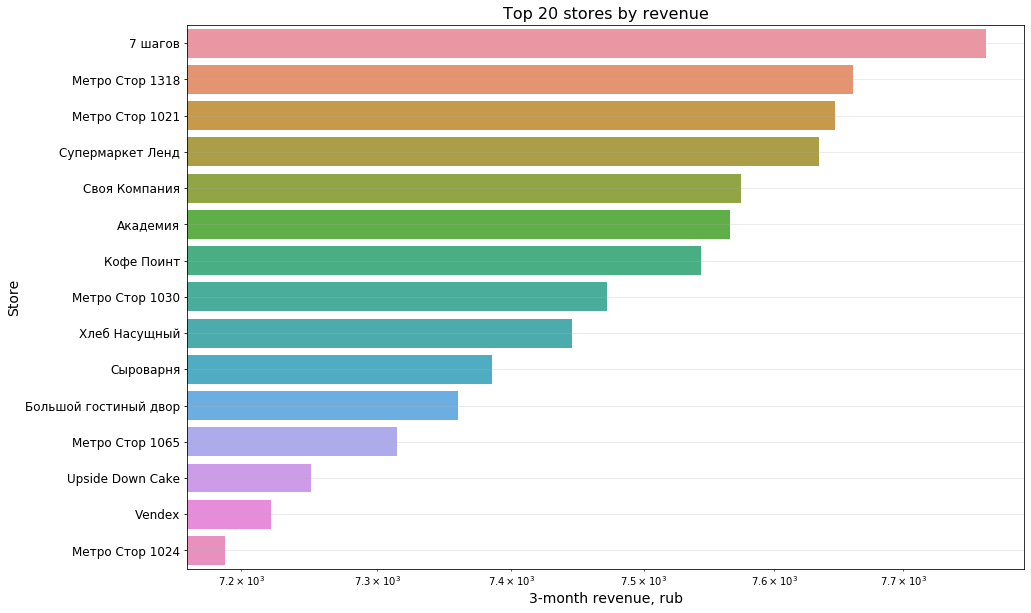

In [44]:
plt.figure(figsize=(15,10))
sns.barplot(store_sums[190:205], store_sums[190:205].index)
plt.title('Top 20 stores by revenue', fontsize=16)
plt.xlabel('3-month revenue, rub', fontsize=14)
plt.ylabel('Store', fontsize=14)
plt.yticks(fontsize=12)
plt.xscale('log')
plt.grid(alpha=0.3)

In [35]:
df['amount'] = df['amount']*1000.0

In [46]:
#Transactions sum per gender
#m = df[df['gender'] == 'M']['amount'].sum()/1000
#f = df[df['gender'] == 'F']['amount'].sum()/1000

#save top 10 merchants
df[df['store_name'].isin(store_sums[190:205].index,)].to_csv('goods.csv', sep=';')

# one store case

In [ ]:
['Fast Food', 'Gift, hobby', 'Restaurants', 'Supermarkets']

In [23]:
mcc['category'].sort_values().unique()

array(['Active rest', 'Alcohol and tobacco', 'Auto', 'Beauty', 'Clothes',
       'Cultural life', 'Design, print', 'Digital goods', 'Discount',
       'Education', 'Fast Food', 'Furniture, home', 'Gambling',
       'Gift, hobby', 'Kids', 'Legal and insurance',
       'Local and autotransport', 'Maintenance and building', 'Medical',
       'Money', 'Other', 'Parking&Fuel', 'Payments', 'Pet',
       'Postal services, delivery', 'Providers',
       'Railway and sea transport', 'Restaurants', 'Services', 'Soft',
       'Sport', 'Supermarkets', 'Taxi', 'Tourism', 'Video games'],
      dtype=object)

In [19]:
df['category_x']

0                 Clothes
1                 Clothes
2                 Clothes
3                 Clothes
4                 Clothes
                ...      
70425552    Cultural life
70425553    Cultural life
70425554    Cultural life
70425555    Cultural life
70425556    Cultural life
Name: category_x, Length: 70425557, dtype: object

In [16]:
df[]

,purchdate,amount,mcc,mrchcity,mrchname,cnum,store_name,merchant_name,category_x,cnum_,categorycode,gender,age,married_,residenttype,category_y,description
0,2019-11-02 00:00:00,9000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in
1,2019-11-02 00:00:00,9000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in
2,2019-11-02 00:00:00,5000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in
3,2019-11-02 00:00:00,5000.0,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in
4,2019-10-03 00:00:00,674.5,5691,MOSCOW,IA7D1H Z1D1T7,MJNLMQ,Chanel,IA7D1H Z1D1T7,Clothes,MJNLMQ,17,F,59,married,R,17,Private Banking customers walk-in


# one merchant case

In [12]:
merch_sums

merchant_name
IBI J-XDH4D1              2.074630e+07
IBI J-XDH4D1 T4K7         9.236797e+06
IBI J-XDH4D1 CI           6.659754e+06
E4D3X99 07D3 I7J8BI7J8    4.756680e+06
Z72WJXC07D3               2.285467e+06
                              ...     
ELEI4 37C1DXHXCD4         4.000000e-03
K2Q6VMFB6 C1Z79XD         3.000000e-03
C1EJX I7KA&I7JJO MVM6     1.000000e-03
C1Z79XD LJSFVVSFS         1.000000e-03
UUU H4EJ1K JL             1.000000e-03
Name: amount, Length: 116943, dtype: float64

In [371]:
# take merchant from top 50, say 39

m_name = merch_sums.index[29]

m_df = df[df['merchant_name'] == m_name]

store_name = m_df.store_name.unique()[0]
city_name = m_df.mrchcity.unique()[0]

m_df = m_df.drop(['mcc', 'mrchname', 'cnum_', 'category_y', 'category_x',
                  'merchant_name', 'store_name', 'mrchcity'], axis=1)

In [372]:
#make some analytics
m_df.head()

,purchdate,amount,cnum,categorycode,gender,age,married_,residenttype,description
24040,2019-11-09 00:00:00,687.00401,MLMLNR,81,M,53,married,R,Affluent Banking payroll customer
35988,2019-11-26 00:00:00,700.00000,ELXC7N,81,M,51,not_married,R,Affluent Banking payroll customer
43268,2019-12-03 00:00:00,160.95984,8XSHNG,81,M,35,married,N,Affluent Banking payroll customer
90822,2019-11-01 00:00:00,300.00000,EL42P6,81,F,39,married,R,Affluent Banking payroll customer
122586,2019-10-17 00:00:00,71.05030,NPTRPT,84,M,38,married,R,Premium Direct Regular Customer


Всего транзакций за период: 3209
Суммарный оборот за период: 258638.25967000003
Число уникальных покупателей: 2325


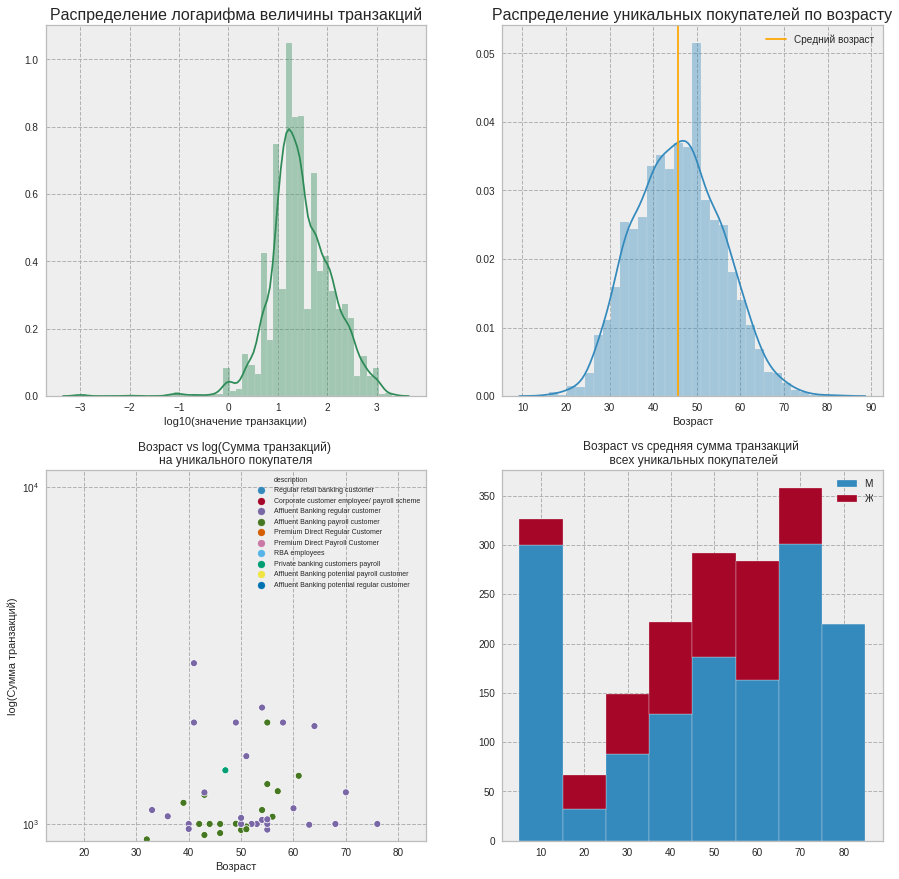

In [375]:
print('Всего транзакций за период:', m_df.shape[0])
print('Суммарный оборот за период:', m_df.amount.sum())
print('Число уникальных покупателей:', m_df.cnum.unique().shape[0])

fig, ax = plt.subplots(2,2, figsize=(15,15))

####
sns.distplot(np.log10(m_df['amount']), ax=ax[0,0], color='seagreen')
ax[0,0].set_title('Распределение логарифма величины транзакций', fontsize=16)
ax[0,0].set_xlabel('log10(значение транзакции)')
# ax[0,1].axvline(m_df['amount'].mean(), color='orange', 
#                 label='Средний возраст')


####
sns.distplot(m_df.groupby('cnum')['age'].mean(), ax=ax[0,1])
ax[0,1].set_title('Распределение уникальных покупателей по возрасту', fontsize=16)
ax[0,1].axvline(m_df.groupby('cnum')['age'].mean().mean(), color='orange', 
                label='Средний возраст')
ax[0,1].legend()
ax[0,1].set_xlabel('Возраст')

####
tmp = m_df.groupby('cnum').agg({'amount':'sum', 
                         'age':'mean', 
                         'description':lambda x: x.unique()[0],
                         'gender':lambda x: x.unique()[0]})

# Map continents to the colors
color_map = dict(zip(color_labels, rgb_values))


sns.scatterplot(data=tmp, x='age', y='amount', ax=ax[1,0], 
               hue=tmp['description'])
#ax[1,0].scatter()
# ax[1,0].scatter(x=tmp['age'],y=tmp['amount'], 
#                 c=tmp['categorycode'].map(color_map))
ax[1,0].set_title('Возраст vs log(Сумма транзакций) \nна уникального покупателя')
ax[1,0].set_ylabel('log(Сумма транзакций)')
ax[1,0].set_xlabel('Возраст')
ax[1,0].legend(fontsize=7)
ax[1,0].set_yscale('log')

####
ax[1,1].set_title('Возраст vs средняя сумма транзакций \n всех уникальных покупателей')
tmp['age'] = tmp['age']//10*10
bot = tmp[tmp['gender']=='F'].groupby('age')['amount'].mean()
up = tmp[tmp['gender']=='M'].groupby('age')['amount'].mean()
hist = pd.merge(up, bot, how='outer', left_index=True, right_index=True).fillna(0)

ax[1,1].bar(hist.index, hist['amount_x'], width=10)
ax[1,1].bar(hist.index, hist['amount_y'], bottom=hist['amount_x'], width=10)
ax[1,1].legend(['М', 'Ж'])
#ax[1,1].set_yscale('log')

plt.show()

## sample 

In [376]:
S = df.sample(40000)

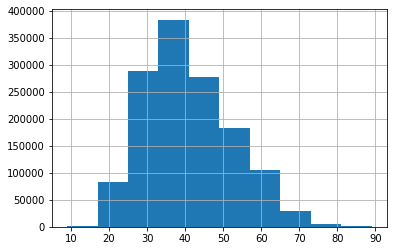

In [20]:
clients['age'].hist()

## Skidki

In [180]:
skidki = pd.read_csv('skidki.csv', sep=';', encoding="windows-1251")
skidki.head(5)

,partner_name,offer_name,category,percents_,selltype,city_name,comment,enddate
0,Teana,Teanа,Парфюмерия и косметика,10.0,Online,NaN,Предложение действительно только в интернет-ма...,2021-10-01 03:00:00
1,Prime Travel,Prime Travel,Путешествия,5.0,Online,NaN,Кэшбэк – возврат средств.Сроки проведения акци...,2020-12-31 03:00:00
2,Special Travel Club,Special Travel Club,Путешествия,12.0,Online,NaN,NaN,2020-12-31 03:00:00
3,Hotels.com,Hotels.com,Путешествия,10.0,NaN,NaN,"Промокод действует только на отели, участвующи...",2020-12-31 03:00:00
4,Яндекс.Плюс,Яндекс.Плюс,Досуг и развлечения,NaN,Online,NaN,90 дней подписки Яндекс.Плюс. Активация по ссы...,2020-12-31 03:00:00


# Forecast

In [312]:
pred = pd.read_csv('result.csv', sep=';', date_parser=True)
t = pred.Date.apply(lambda x: x.split(' ')[0])

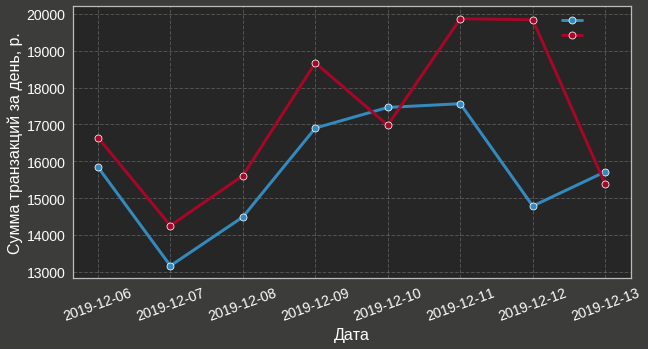

In [368]:
#plt.style.use("seaborn-notebook")
#plt.rcParams['axes.facecolor']=[(60, 60, 58)]
fig, ax = plt.subplots(figsize=(10,5), facecolor=(60/255, 60/255, 58/255))

#plt.figure(figsize=(10,5))
sns.lineplot(t, pred['Actual'], lw=3, marker='o', label='Actual', ax=ax)
sns.lineplot(t, pred['Predict'], lw=3, marker='o', label='Predict', ax=ax)
ax.set_facecolor((38/255, 38/255, 38/255))
plt.grid(alpha=0.3)
plt.xticks(rotation=20, fontsize=14, color='white')
plt.yticks( fontsize=14, color='white')
plt.xlabel('Дата', fontsize=16, color='white')
plt.ylabel('Сумма транзакций за день, р.', fontsize=16, color='white')
ax.tick_params(labelcolor='tab:orange')
plt.savefig('fig.png', dpi=250)
plt.legend(['Actual', 'Predict'])

plt.show()